### 1. Import Dependencies

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 2. Load data

In [ ]:
df = pd.read_csv('../data/processed/countries_pca_4components.csv')
df.head()
X=df.values

### 3. Define DBSCAN Functions

In [26]:
def dbscan(D, eps, MinPts):
    labels = np.zeros(D.shape[0], dtype=int)  # 0 = unvisited
    C = 0  # cluster ID

    for P in range(D.shape[0]):
        if labels[P] != 0:
            continue

        NeighborPts = region_query(D, P, eps)
        if len(NeighborPts) < MinPts:
            labels[P] = -1  # noise
        else:
            C += 1
            grow_cluster(D, labels, P, NeighborPts, C, eps, MinPts)

    return labels


def grow_cluster(D, labels, P, NeighborPts, C, eps, MinPts):
    labels[P] = C
    i = 0
    while i < len(NeighborPts):
        Pn = NeighborPts[i]

        if labels[Pn] == -1:
            labels[Pn] = C
        elif labels[Pn] == 0:
            labels[Pn] = C
            PnNeighborPts = region_query(D, Pn, eps)
            if len(PnNeighborPts) >= MinPts:
                NeighborPts += PnNeighborPts  # expand queue

        i += 1


def region_query(D, P, eps):
    distances = np.linalg.norm(D - D[P], axis=1)
    neighbors = np.where(distances < eps)[0].tolist()
    return neighbors

### 4. Run DBSCAN

In [27]:
eps = 0.5   # distance threshold
MinPts = 5  # minimum points to form a cluster

# Run DBSCAN
labels = dbscan(X, eps, MinPts)

# Print results
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = np.sum(labels == -1)
print(f"Estimated number of clusters: {n_clusters}")
print(f"Number of noise points: {n_noise}")

Estimated number of clusters: 1
Number of noise points: 0


### 5. Visualize DBSCAN Clusters (using first two PCA components)

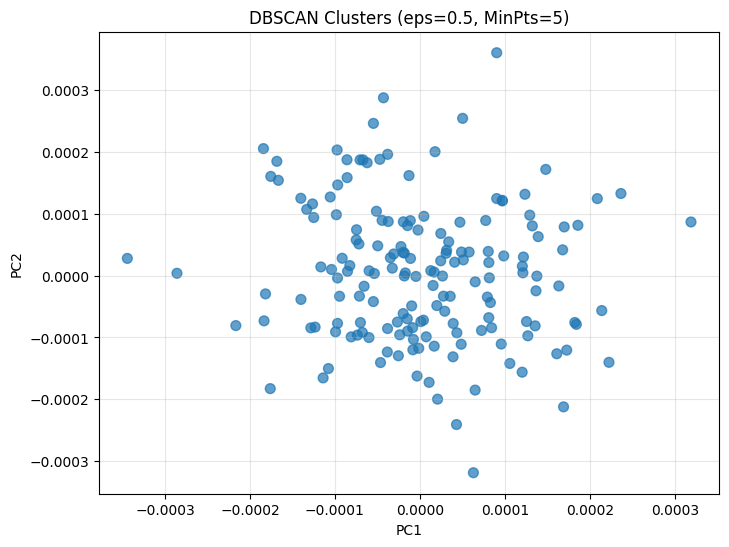

In [28]:

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='tab10', s=50, alpha=0.7)
plt.title(f'DBSCAN Clusters (eps={eps}, MinPts={MinPts})')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid(alpha=0.3)
plt.show()

### sklearn

[sklearn] Estimated number of clusters: 1
[sklearn] Number of noise points: 0


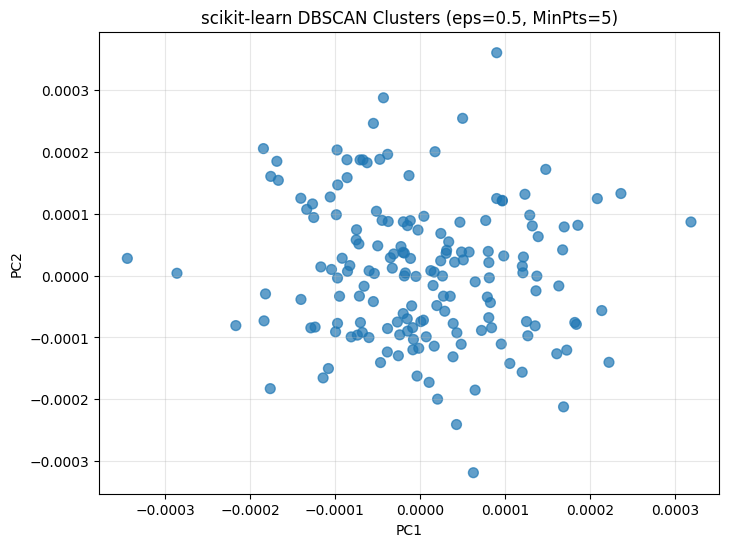

In [29]:
# %% [markdown]
# ### 6. DBSCAN using scikit-learn

# %%
from sklearn.cluster import DBSCAN

# DBSCAN parameters
eps = 0.5
MinPts = 5

# Fit DBSCAN
db = DBSCAN(eps=eps, min_samples=MinPts)
sk_labels = db.fit_predict(X)  # X is your data from PCA

# Print results
n_clusters_sk = len(set(sk_labels)) - (1 if -1 in sk_labels else 0)
n_noise_sk = np.sum(sk_labels == -1)
print(f"[sklearn] Estimated number of clusters: {n_clusters_sk}")
print(f"[sklearn] Number of noise points: {n_noise_sk}")

# %% [markdown]
# ### 7. Visualize scikit-learn DBSCAN clusters

# %%
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=sk_labels, cmap='tab10', s=50, alpha=0.7)
plt.title(f'scikit-learn DBSCAN Clusters (eps={eps}, MinPts={MinPts})')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid(alpha=0.3)
plt.show()
